In [3]:
#####################--Importing Data--#####################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")


# read the data and set cust_id as the index
data = "C:/Users/sneha/Downloads/diabetes2.csv"
#df = pd.read_csv(data, index_col="cust_id", parse_dates=True,dtype={'emp_number':str, 'annual_revenue':str,'yrs_in_biz':str,'industry':str})
df=pd.read_csv(data,parse_dates=True)

In [25]:
#################----Checking null values----############
print(df.isnull().sum())
print(df.info())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
conda upgrade --all 

In [ ]:
####################--Bivariate Analysis--------################

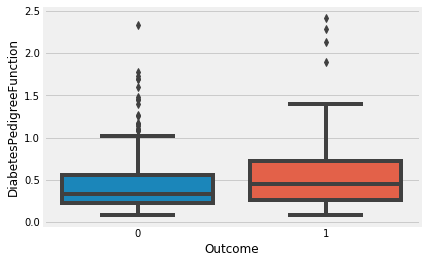

In [6]:
#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")

ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)


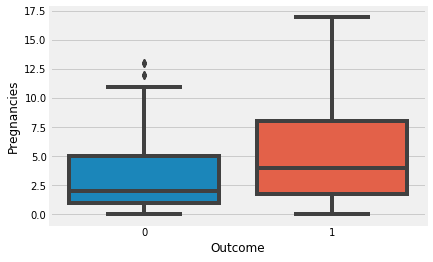

In [9]:
ax = sns.boxplot(x="Outcome", y="Pregnancies", data=df)

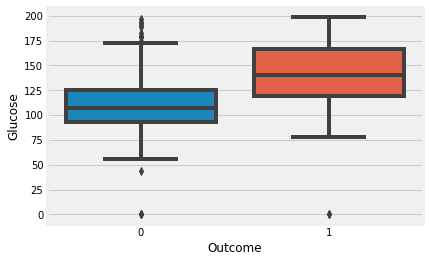

In [10]:
ax = sns.boxplot(x="Outcome", y="Glucose", data=df)

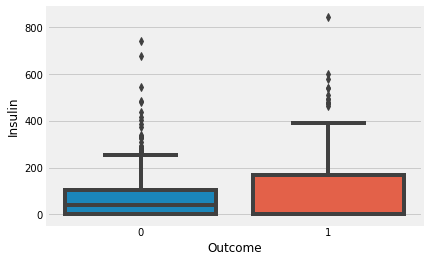

In [11]:
ax = sns.boxplot(x="Outcome", y="Insulin", data=df)

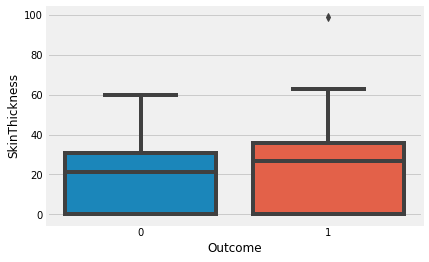

In [16]:
ax = sns.boxplot(x="Outcome", y="SkinThickness", data=df)

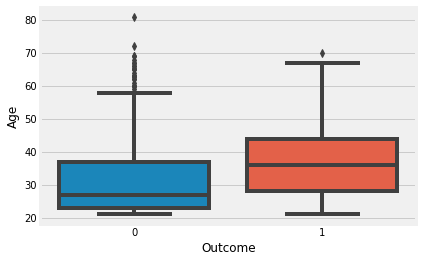

In [17]:
ax = sns.boxplot(x="Outcome", y="Age", data=df)

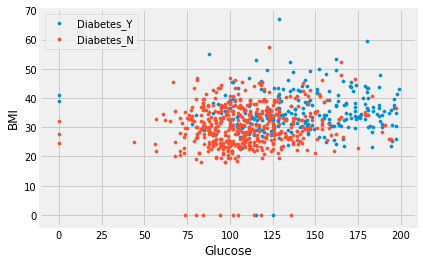

In [8]:
diabetes_yes = df.loc[df.Outcome == 1]

# filter out the applicants that din't get admission
diabetes_no = df.loc[df.Outcome == 0]

# plots
plt.scatter(diabetes_yes.iloc[:, 1], diabetes_yes.iloc[:, 5], s=10, label='Diabetes_Y')
plt.scatter(diabetes_no.iloc[:, 1], diabetes_no.iloc[:, 5], s=10, label='Diabetes_N')
#plt.title("Glucose vs")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.show()

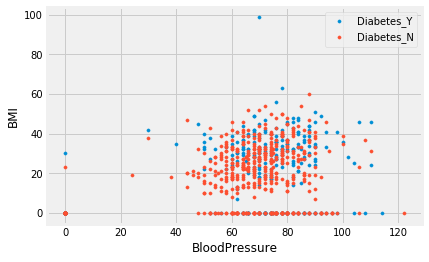

In [4]:
# plots
plt.scatter(diabetes_yes.iloc[:, 2], diabetes_yes.iloc[:, 3], s=10, label='Diabetes_Y')
plt.scatter(diabetes_no.iloc[:, 2], diabetes_no.iloc[:, 3], s=10, label='Diabetes_N')
#plt.title("Glucose vs")
plt.xlabel("BloodPressure")
plt.ylabel("BMI")
plt.legend()
plt.show()

In [5]:
############---Splitting Data--#############
a=df
X=a.drop(columns=['Outcome'])
y=a.Outcome

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99 )


In [ ]:
##################################---1 Logistic Regression---####################################

In [6]:
###########################1a.running  Logistic Regression on Training Dataset

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)



C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
##########################1b.predicting Confusion Matrix on training dataset
y_pred_train = LogReg.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)
roc_auc_score(y_train, y_pred_train)


[[352  43]
 [101 118]]


0.7149760129472285

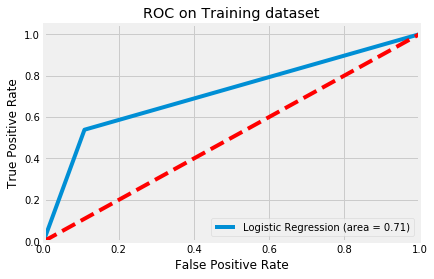

In [68]:
##########################1c.ROC curve on training dataset
p
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Training dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

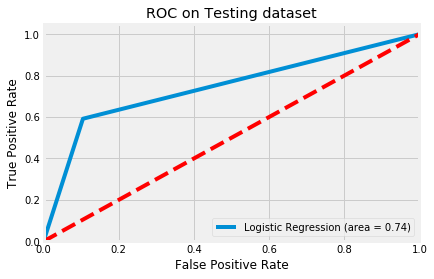

In [70]:
##########################1d.ROC curve on testing dataset
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_test = LogReg.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Testing dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
##########################1e.AUC on testing dataset
#y_pred_test = LogReg.predict(X_test)
#y_pred_test = clf.predict(X_test)
y_pred_test=clf_rf.predict(X_test)
roc_auc_score(y_test, y_pred_test)

0.7387755102040816

In [74]:
##########################1f.predicting Confusion Matrix on testing dataset
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[94, 11],
       [20, 29]], dtype=int64)

In [ ]:
##################################---2 Decision tree---####################################

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred_train = clf.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Training confusion matrix",confusion_matrix_train)

print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

print("Training confusion matrix",confusion_matrix_train)
#Testing dataset
y_pred_test = clf.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

print("Training confusion matrix",confusion_matrix_test)

Training Accuracy: 0.760586319218241
Training confusion matrix [[317  78]
 [ 69 150]]
Testing Accuracy: 0.7402597402597403
Training confusion matrix [[81 24]
 [16 33]]


In [73]:
##################################---3 Random Forest---####################################

In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100,max_depth=4,criterion='entropy',min_samples_leaf=2,
                                min_samples_split =2,random_state = 42)# Train the model on training data
clf_rf.fit(X_train, y_train)

###training dataset
y_pred_train=clf_rf.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Training confusion matrix",confusion_matrix_train)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

###testing dataset
y_pred_test=clf_rf.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Training confusion matrix",confusion_matrix_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Training confusion matrix [[364  31]
 [ 80 139]]
Training Accuracy: 0.8192182410423453
Training confusion matrix [[93 12]
 [20 29]]
Testing Accuracy: 0.7922077922077922


In [ ]:
##################################---4 RandomizedSeacrhcv Random Forest---####################################

In [13]:
############################4a.Randomizedsearchcv
from sklearn.metrics import confusion_matrix
#############----------a.Setting parameters------------------################
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)]
#n_estimators=[200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion':['entropy'],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#############----------b.running RandomizedSearchCV------------------################
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
print(random_grid)

rf = RandomForestClassifier(n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 50, cv = 2,verbose=2, error_score='raise-deprecating',
                               scoring ='accuracy', random_state=3)
rf_random.fit(X_train, y_train)



rf_randserchcv = rf_random.best_estimator_
import pandas as pd
feature_importances = pd.DataFrame(rf_randserchcv.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                           
                                                                        ascending=False)
print(feature_importances)


{'n_estimators': [50, 62, 75, 87, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'criterion': ['entropy'], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}
Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] n_estimators=62, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, criterion=entropy, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=62, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=62, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=62, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samp

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=87, min_s

[CV]  n_estimators=87, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=87, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True 
[CV]  n_estimators=87, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=62, min_samp

[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=87, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True 
[CV]  n_estimators=87, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=87, min_samp

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.6s finished


                          importance
Glucose                     0.383573
BMI                         0.166468
Age                         0.153887
DiabetesPedigreeFunction    0.095722
Pregnancies                 0.059364
Insulin                     0.051031
SkinThickness               0.046391
BloodPressure               0.043566


In [40]:
############################4b.confusion matrix and accuarcy
y_pred_train = rf_randserchcv.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Training confusion matrix",confusion_matrix_train)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

#####testing
y_pred_test = rf_randserchcv.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Training confusion matrix",confusion_matrix_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))


Training confusion matrix [[364  31]
 [ 83 136]]
Training Accuracy: 0.8143322475570033
Training confusion matrix [[95 10]
 [17 32]]
Testing Accuracy: 0.8246753246753247


In [39]:
############################4c.best params given my method
rf_randserchcv.best_params_

{'n_estimators': 62,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'entropy',
 'bootstrap': True}

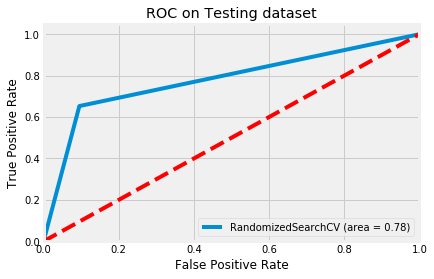

In [94]:
############################4d.ROC plot on testing dataset
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_test =rf_randserchcv.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='RandomizedSearchCV (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Testing dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()